# Import Library:

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes
from kneed import KneeLocator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Setup Completed !')

Setup Completed !


# Import Data:

In [2]:
df = pd.read_excel('doanhthu_tuongot.xlsx')
df

,Unnamed: 0,Tổng doanh thu,Ngày xuất,Khu vực,Mã siêu thị,Loại siêu thị,Tên ngành hàng,Tên nhóm hàng,Hãng Sản xuất,Doanh thu
0,NaN,13776881,2023-03-28,BHX_AM - Tấn Vũ-24470,2546 - BHX_HCM_Q12 - 305 KP1 Tân Thới Hiệp,2 tỷ - < 5 tỷ,1055 - Thực phẩm - Gia vị các loại,"3109 - Tương ớt, tương cà",CHOLIMEX,11182
1,NaN,13776881,2023-03-28,BHX_AM - Hồng Nhung-45408,2794 - BHX_HCM_BCH - B11B/13F Võ Văn Vân,2 tỷ - < 5 tỷ,1055 - Thực phẩm - Gia vị các loại,"3109 - Tương ớt, tương cà",CHINSU,13273
2,NaN,13776881,2023-03-28,BHX_AM - Văn Ngoan-16565,3257 - BHX_HCM_TDU - 99 Tăng Nhơn Phú,2 tỷ - < 5 tỷ,1055 - Thực phẩm - Gia vị các loại,"3109 - Tương ớt, tương cà",CHOLIMEX,10273
3,NaN,13776881,2023-03-28,BHX_AM - Thanh Nga-43052,2046 - BHX_HCM_BTA - 54 Trần Đại Nghĩa,"1,2 tỷ - < 2 tỷ",1055 - Thực phẩm - Gia vị các loại,"3109 - Tương ớt, tương cà",CHINSU,23909
4,NaN,13776881,2023-03-28,BHX_AM - Vĩnh Hưng-1253,3590 - BHX_HCM_GVA - 288 Phan Huy Ích,"1,2 tỷ - < 2 tỷ",1055 - Thực phẩm - Gia vị các loại,"3109 - Tương ớt, tương cà",NAM DƯƠNG,9091
...,...,...,...,...,...,...,...,...,...,...
596,NaN,13776881,2023-03-28,BHX_AM - Thu Phương-2455,7841 - BHX_HCM_NBE - 2635 Huỳnh Tấn Phát,<900 triệu,1055 - Thực phẩm - Gia vị các loại,"3109 - Tương ớt, tương cà",CHOLIMEX,23818
597,NaN,13776881,2023-03-28,BHX_AM - Minh Đức-46061,1531 - BHX_HCM_BTA - 175 Đường số 8,"1,2 tỷ - < 2 tỷ",1055 - Thực phẩm - Gia vị các loại,"3109 - Tương ớt, tương cà",CHOLIMEX,72636
598,NaN,13776881,2023-03-28,BHX_AM - Hồng Ngọc-43939,4134 - BHX_HCM_Q10 - 97 Hòa Hưng,2 tỷ - < 5 tỷ,1055 - Thực phẩm - Gia vị các loại,"3109 - Tương ớt, tương cà",CHINSU,13545
599,NaN,13776881,2023-03-28,BHX_AM - Văn Hòa-34148,3743 - BHX_HCM_Q04 - 115 Xóm Chiếu,"1,2 tỷ - < 2 tỷ",1055 - Thực phẩm - Gia vị các loại,"3109 - Tương ớt, tương cà",NAM DƯƠNG,34455


In [3]:
df_new = df[['Khu vực','Mã siêu thị','Loại siêu thị','Hãng Sản xuất','Doanh thu']]
df_new.head()

,Khu vực,Mã siêu thị,Loại siêu thị,Hãng Sản xuất,Doanh thu
0,BHX_AM - Tấn Vũ-24470,2546 - BHX_HCM_Q12 - 305 KP1 Tân Thới Hiệp,2 tỷ - < 5 tỷ,CHOLIMEX,11182
1,BHX_AM - Hồng Nhung-45408,2794 - BHX_HCM_BCH - B11B/13F Võ Văn Vân,2 tỷ - < 5 tỷ,CHINSU,13273
2,BHX_AM - Văn Ngoan-16565,3257 - BHX_HCM_TDU - 99 Tăng Nhơn Phú,2 tỷ - < 5 tỷ,CHOLIMEX,10273
3,BHX_AM - Thanh Nga-43052,2046 - BHX_HCM_BTA - 54 Trần Đại Nghĩa,"1,2 tỷ - < 2 tỷ",CHINSU,23909
4,BHX_AM - Vĩnh Hưng-1253,3590 - BHX_HCM_GVA - 288 Phan Huy Ích,"1,2 tỷ - < 2 tỷ",NAM DƯƠNG,9091


In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Khu vực        601 non-null    object
 1   Mã siêu thị    601 non-null    object
 2   Loại siêu thị  601 non-null    object
 3   Hãng Sản xuất  601 non-null    object
 4   Doanh thu      601 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 23.6+ KB


# Clustering:

In [6]:
X = df_new.values

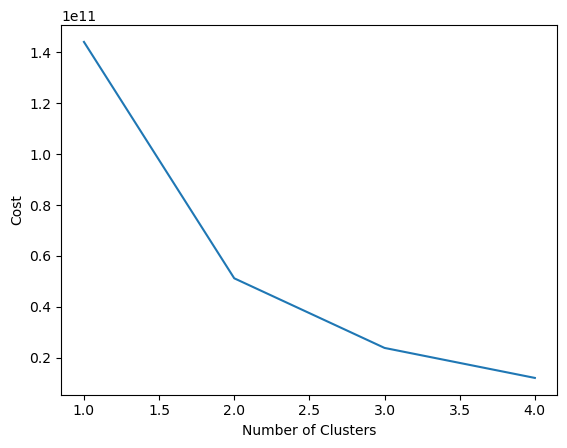

In [11]:
cost = []
for num in range(1, 5):
    kproto = KPrototypes(n_jobs = -1, n_clusters =  num, init = 'Cao', verbose = 0)
    kproto.fit_predict (X, categorical = [0,1,2,3])
    cost.append(kproto.cost_)
plt.plot(range(1,5), cost)
plt.xlabel ('Number of Clusters')
plt.ylabel ('Cost')
plt.show();

In [12]:
kn = KneeLocator(range(1,5), cost, curve = 'convex', direction= 'decreasing', S = 0.1, online = True)
print('Optimal Clusters: ', kn.elbow)

Optimal Clusters:  2


In [15]:
kproto = KPrototypes(n_clusters= kn.elbow, init='Cao', verbose=0)
clusters = kproto.fit_predict(X, categorical=[0,1,2,3])
df_new['Cluster'] = clusters
df_new.head()

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_5294/2899938041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cluster'] = clusters


,Khu vực,Mã siêu thị,Loại siêu thị,Hãng Sản xuất,Doanh thu,Cluster
0,BHX_AM - Tấn Vũ-24470,2546 - BHX_HCM_Q12 - 305 KP1 Tân Thới Hiệp,2 tỷ - < 5 tỷ,CHOLIMEX,11182,0
1,BHX_AM - Hồng Nhung-45408,2794 - BHX_HCM_BCH - B11B/13F Võ Văn Vân,2 tỷ - < 5 tỷ,CHINSU,13273,0
2,BHX_AM - Văn Ngoan-16565,3257 - BHX_HCM_TDU - 99 Tăng Nhơn Phú,2 tỷ - < 5 tỷ,CHOLIMEX,10273,0
3,BHX_AM - Thanh Nga-43052,2046 - BHX_HCM_BTA - 54 Trần Đại Nghĩa,"1,2 tỷ - < 2 tỷ",CHINSU,23909,0
4,BHX_AM - Vĩnh Hưng-1253,3590 - BHX_HCM_GVA - 288 Phan Huy Ích,"1,2 tỷ - < 2 tỷ",NAM DƯƠNG,9091,0


# Encoding and Regression:

In [17]:
le = LabelEncoder()
df_new['Khu vực Encode'] = le.fit_transform(df_new['Khu vực'])
df_new['Mã ST Encode'] = le.fit_transform(df_new['Mã siêu thị'])
df_new['Loại ST Encode'] = le.fit_transform(df_new['Loại siêu thị'])
df_new['Hãng SX Encode'] = le.fit_transform(df['Hãng Sản xuất'])
df_new.head()

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_5294/2394702331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Khu vực Encode'] = le.fit_transform(df_new['Khu vực'])
/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_5294/2394702331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Mã ST Encode'] = le.fit_transform(df_new['Mã siêu thị'])
/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_5294/2394702331.py:4: SettingWithCopyWarning: 
A value is trying to be 

,Khu vực,Mã siêu thị,Loại siêu thị,Hãng Sản xuất,Doanh thu,Cluster,Khu vực Encode,Mã ST Encode,Loại ST Encode,Hãng SX Encode
0,BHX_AM - Tấn Vũ-24470,2546 - BHX_HCM_Q12 - 305 KP1 Tân Thới Hiệp,2 tỷ - < 5 tỷ,CHOLIMEX,11182,0,36,73,1,2
1,BHX_AM - Hồng Nhung-45408,2794 - BHX_HCM_BCH - B11B/13F Võ Văn Vân,2 tỷ - < 5 tỷ,CHINSU,13273,0,12,83,1,1
2,BHX_AM - Văn Ngoan-16565,3257 - BHX_HCM_TDU - 99 Tăng Nhơn Phú,2 tỷ - < 5 tỷ,CHOLIMEX,10273,0,38,113,1,2
3,BHX_AM - Thanh Nga-43052,2046 - BHX_HCM_BTA - 54 Trần Đại Nghĩa,"1,2 tỷ - < 2 tỷ",CHINSU,23909,0,30,40,0,1
4,BHX_AM - Vĩnh Hưng-1253,3590 - BHX_HCM_GVA - 288 Phan Huy Ích,"1,2 tỷ - < 2 tỷ",NAM DƯƠNG,9091,0,40,146,0,5


In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Khu vực         601 non-null    object
 1   Mã siêu thị     601 non-null    object
 2   Loại siêu thị   601 non-null    object
 3   Hãng Sản xuất   601 non-null    object
 4   Doanh thu       601 non-null    int64 
 5   Cluster         601 non-null    uint16
 6   Khu vực Encode  601 non-null    int64 
 7   Mã ST Encode    601 non-null    int64 
 8   Loại ST Encode  601 non-null    int64 
 9   Hãng SX Encode  601 non-null    int64 
dtypes: int64(5), object(4), uint16(1)
memory usage: 43.6+ KB


In [19]:
df_new['Hãng SX Encode'].unique()

array([2, 1, 5, 4, 8, 0, 6, 3, 7])

In [32]:
X = df_new[['Cluster','Loại ST Encode', 'Hãng SX Encode']]
y = df_new['Doanh thu']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)
ln = LinearRegression()
model = ln.fit(X_train, y_train)
score = model.score(X,y)
y_pred = model.predict(X_test)
print(score, y_pred)

0.6459760780324855 [18119.49214215 16944.68362391 51071.08914783 17421.62996424
 51548.03548815 18596.43848247 17421.62996424 16357.2793648
 49896.28062959 18119.49214215 17532.08788303 16211.70678086
 49785.8227108  18119.49214215 18009.03422335 16101.24886207
 16101.24886207 16688.65312118 16688.65312118 18009.03422335
 17532.08788303 18485.98056367 16944.68362391 51071.08914783
 15624.30252174 16944.68362391 15990.79094327 16688.65312118
 15513.84460295 18596.43848247 16357.2793648  50960.63122903
 17421.62996424 18596.43848247 49052.84586775 17532.08788303
 17421.62996424 18009.03422335 17532.08788303 17421.62996424
 19073.38482279 18119.49214215 18596.43848247 51548.03548815
 18596.43848247 16688.65312118 17421.62996424 18596.43848247
 16688.65312118 16688.65312118 18119.49214215 17421.62996424
 51548.03548815 16357.2793648  18119.49214215 18596.43848247
 50373.22696992 51548.03548815 50960.63122903 14670.4098411
 51071.08914783 50960.63122903 17421.62996424 51548.03548815
 18119.